In [122]:
# These lines import the numpy, datascience, and cs104 libraries.

import numpy as np
from datascience import *
from cs104 import *
%matplotlib inline

The cs104 libraries can be found here: 
https://www.cs.williams.edu/~cs104/auto/python-library-ref.html
https://www.cs.williams.edu/~cs104/auto/inference-library-ref.html

## 0. Source of data

Our dataset is a subset of a college basketball dataset from Kaggle, the URL is https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset. The source for the data is https://barttorvik.com/trank.php#. Credit goes to Andrew Sundberg, who collected and cleaned the dataset.

## 1. Quantitative questions

Is there a stronger correlation between offensive efficency and win percentage or defensive efficiency and win percentage? (Is defense or offense more important?) Can we combine offensive efficency and defensive efficiency to get a better predictor of win percentage? The answers to these questions can inform coaches, players, and fans of college basketball and are impactful to winning. 

## 2. Data

In [123]:
college_basketball = Table.read_table('cbb.csv')
college_basketball = college_basketball.select("TEAM","CONF", "G", "W", "ADJOE", "ADJDE", "YEAR").take_clean("TEAM", str, "CONF", str, "G", int, "W", int, "ADJOE", float, "ADJDE", float, "YEAR", int)
college_basketball.show(3)

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR
North Carolina,ACC,40,33,123.3,94.9,2016
Wisconsin,B10,40,36,129.1,93.6,2015
Michigan,B10,40,33,114.4,90.4,2018


TEAM: The Division I college basketball school

CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

YEAR: Season



## 3. Data wrangling

In [124]:
avg_offensive_efficiency = np.mean(college_basketball.column("ADJOE"))
avg_offensive_efficiency

103.15131989781436

The average offensive efficiency among all division 1 teams is 103.15. This means per 100 possessions, the average college basketball team would score 103 points.

In [125]:
def win_percent_tables(i):
    cbb_i = college_basketball.where('YEAR', are.equal_to(i))
    win_percentage_i = cbb_i.column('W') / cbb_i.column('G')

    cbb_i = cbb_i.with_column('WIN PERCENTAGE', win_percentage_i).sort('WIN PERCENTAGE', descending = True)
    return cbb_i

This function takes a year as input and returns a table sorted by win percentage for that year.

In [126]:
win_percent_tables(2013)

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,WIN PERCENTAGE
Gonzaga,WCC,34,31,118.9,90.2,2013,0.911765
Louisville,BE,40,35,115.9,84.5,2013,0.875
Memphis,CUSA,36,31,106.1,90.2,2013,0.861111
Kansas,B12,37,31,111.6,86.2,2013,0.837838
Duke,ACC,36,30,118.4,91.5,2013,0.833333
New Mexico,MWC,35,29,107,91.1,2013,0.828571
Middle Tennessee,SB,34,28,105.1,91,2013,0.823529
Stephen F. Austin,Slnd,28,23,98,88.7,2013,0.821429
Bucknell,Pat,33,27,104.7,93.1,2013,0.818182
Indiana,B10,36,29,121,89.7,2013,0.805556


For example, Gonzaga had the highest win % in 2013, with a win percentage of 91%

In [127]:
def conf_eff_tables(i):
    cbb_i = college_basketball.where('YEAR', are.equal_to(i))
    conf_eff_i = cbb_i.group('CONF', np.mean).select('CONF', 'ADJOE mean', 'ADJDE mean').sort('ADJOE mean', descending = True)
    
    return conf_eff_i

In [128]:
conf_eff_tables(2013)

CONF,ADJOE mean,ADJDE mean
B10,109.892,92.25
BE,107.74,92.6867
ACC,107.467,95.3833
P12,106.958,94.55
B12,106.88,95.57
MWC,106.267,95.6667
A10,106.113,97.1125
MVC,105.31,97.41
WCC,104.844,98.3889
SEC,104.486,95.5643


This function takes a year and gives a table with the conferences' adjusted offensive and defensive efficiency in that year, sorted by mean adjusted offensive efficiency (ADJOE). In 2013, the Big 10 led all conferences in mean ADJOE.

## 4. Visualizations

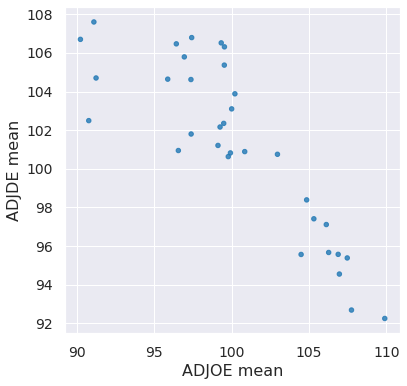

In [129]:
conf_eff_tables(2013).scatter('ADJOE mean', 'ADJDE mean')

Conferences with a better average offense tend to have a better average defense, which is not surprising: coaches in better conferences recruit better players across the board (regardless of offense and defense) due to historical success, better facilities, and better NIL deals.

In [130]:
def teams_stats(team_name, stat):
    plot = college_basketball.where('TEAM', team_name).select('YEAR', stat).plot('YEAR').set_title(team_name + ' ' + stat + ' by Year')

In [131]:
all_teams = np.unique(college_basketball.column('TEAM'))
all_stats = ('G', 'W', 'ADJOE', 'ADJDE')

interact(teams_stats,team_name = Choice(all_teams), stat = Choice(all_stats))

interactive(children=(Dropdown(description='team_name', options=('Abilene Christian', 'Air Force', 'Akron', 'A…

This interactive graphic allows you to select a team and a stat and observe its change over time.

## 5. Statistical Inference

In [132]:
college_basketball = college_basketball.with_columns("COMBINED", college_basketball.column("ADJOE") - college_basketball.column("ADJDE"))
college_basketball = college_basketball.with_columns("WIN PERCENTAGE", college_basketball.column("W") / college_basketball.column("G"))
college_basketball


TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,COMBINED,WIN PERCENTAGE
North Carolina,ACC,40,33,123.3,94.9,2016,28.4,0.825
Wisconsin,B10,40,36,129.1,93.6,2015,35.5,0.9
Michigan,B10,40,33,114.4,90.4,2018,24,0.825
Texas Tech,B12,38,31,115.2,85.2,2019,30,0.815789
Gonzaga,WCC,39,37,117.8,86.3,2017,31.5,0.948718
Kentucky,SEC,40,29,117.2,96.2,2014,21,0.725
Michigan,B10,38,30,121.5,93.7,2013,27.8,0.789474
Duke,ACC,39,35,125.2,90.6,2015,34.6,0.897436
Virginia,ACC,38,35,123,89.9,2019,33.1,0.921053
North Carolina,ACC,39,33,121,91.5,2017,29.5,0.846154


In [133]:
pearson_correlation(college_basketball, "ADJOE", "WIN PERCENTAGE")

0.6892189320925526

In [134]:
pearson_correlation(college_basketball, "ADJDE", "WIN PERCENTAGE")

-0.6331835230554312

Both offense and defense are correlated with win percentage. Offense is slightly more important, but it is a small enough difference where we aren't confident saying offense is better to focus on.

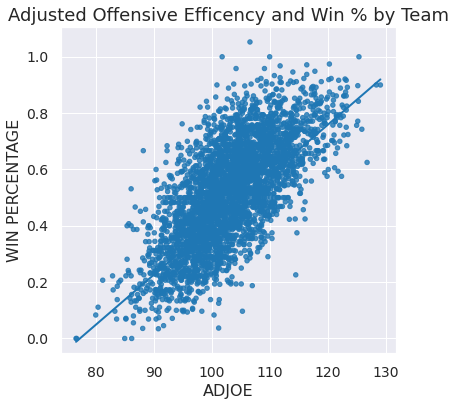

In [135]:
adjoe = linear_regression(college_basketball, "ADJOE", "WIN PERCENTAGE")
a_o = adjoe.item(0)
b_o = adjoe.item(1)
plot_scatter_with_line(college_basketball, "ADJOE", "WIN PERCENTAGE", a_o , b_o).set_title("Adjusted Offensive Efficency and Win % by Team")

In this plot, each dot represents a team, where their ADJOE is their horizontal placement and their win percentage is their vertical placement. This shows the correlation between offense and win percentage visually.

In [136]:
r2_score(college_basketball, "ADJOE", "WIN PERCENTAGE", a_o, b_o)

0.3746989674165542

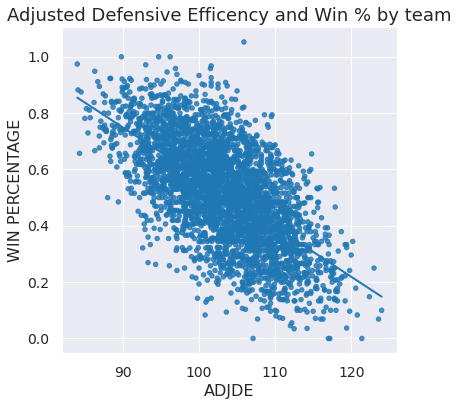

In [137]:
adjde = linear_regression(college_basketball, "ADJDE", "WIN PERCENTAGE")
a_d = adjde.item(0)
b_d = adjde.item(1)
plot_scatter_with_line(college_basketball, "ADJDE", "WIN PERCENTAGE", a_d , b_d).set_title("Adjusted Defensive Efficency and Win % by team")

Similarly, allowing more points leads to a lower win percentage (an ADJDE of 110 means allowing 110 points per 100 possessions, which is worse than an ADJDE of 90), which is why we see a negative correlation between ADJDE and win percentage.

In [138]:
r2_score(college_basketball, "ADJDE", "WIN PERCENTAGE", a_d, b_d)

0.40092137386888516

Comparing r-squared scores, we see that only slightly more variation in win percentage is taken account for when using ADJDE versus ADJOE (37.5% to 40.1%, respectively).

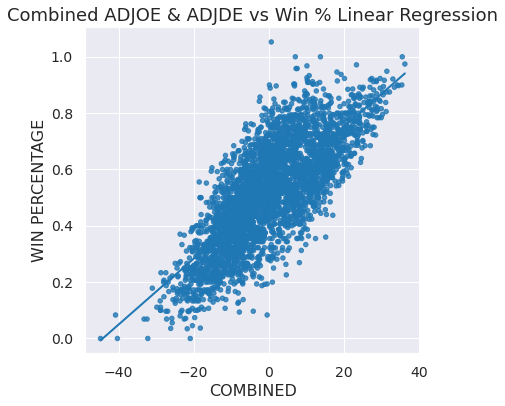

In [139]:
combined = linear_regression(college_basketball, "COMBINED", "WIN PERCENTAGE")
a = combined.item(0)
b = combined.item(1)
plot_scatter_with_line(college_basketball, "COMBINED", "WIN PERCENTAGE", a, b).set_title("Combined ADJOE & ADJDE vs Win % Linear Regression")

In [140]:
r2_score(college_basketball, "COMBINED", "WIN PERCENTAGE", a, b)

0.5873614956412267

When we combine the two efficiency statistics, we see a boost in the accuracy of the win percentage prediction. Now about 58.7% of the variation in win percentage is accounted for by this combined metric.

In conclusion, our combined statistic, created by subtracting ADJDE from ADJOE, is a better metric for predicting win percentage than offense or defense alone. Many still tout that 'Defense wins championships', but in recent years, a more holistic approach should be considered. Looking at ADJOE and ADJDE for specific teams can be interesting to observe strengths and weaknesses, but as far as predictive value, they are weak.